# Worksheet 24

Name: Pratham Shroff
UID: U00574969

### Topics

- Tuning Neural Networks

## Tuning Neural Networks

Nothing to do in this worksheet except follow along in lecture / use this code to better understand Neural Networks.

Note: Missed part of class due to advisor appointment so poked around varous places on GitHub, Google and even took some help from AI tools like ChatGPT & Bard to explore / better understand Neural Networks by myself. Put in a lot of time & effort, hoping to get full credit. Thank you.

In [ ]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from tensorflow import keras, math, random, stack
from tensorflow.keras import layers, initializers
from tensorflow.keras.activations import relu

# Set random seed for reproducibility
np.random.seed(1)
random.set_seed(1)

# Data generation - don't modify
centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=200, centers=centers, cluster_std=1,
                                random_state=1)

colors = np.array([x for x in 'bgrcmyk'])

# CURVE
def generate_curve_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x : m.cos(4*x[0]) - x[1] < -.5 or m.cos(4*x[0]) - x[1] > .5, t)))
    Y = np.array([1 if m.cos(4*x[0]) - x[1] >= 0 else 0 for x in X])
    return X, Y

# The model - modify this
model = keras.models.Sequential()
model.add(layers.Dense(3, input_dim=2, activation="sigmoid"))
model.add(layers.Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy")

X, Y = generate_curve_data(t)

# plot the data
plt.scatter(X[:,0],X[:,1],color=colors[Y].tolist(), s=100, alpha=.9)
plt.show()

history = model.fit(X, Y, batch_size=50, epochs=200)

# Plot the decision boundary

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
Z = model.predict(meshData)
Z = np.array([0 if x < .5 else 1 for x in Z])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=.3, cmap=plt.cm.Paired)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], color=colors[Y].tolist(), s=100, alpha=.9)
plt.title("Decision Boundary")
plt.show()

Epoch 1/100
4/4 [==============================] - 3s 296ms/step - loss: 0.7098 - accuracy: 0.4679 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 2/100
4/4 [==============================] - 0s 26ms/step - loss: 0.6955 - accuracy: 0.4862 - val_loss: 0.6860 - val_accuracy: 0.6429
Epoch 3/100
4/4 [==============================] - 0s 73ms/step - loss: 0.6870 - accuracy: 0.5138 - val_loss: 0.6788 - val_accuracy: 0.7143
Epoch 4/100
4/4 [==============================] - 0s 46ms/step - loss: 0.6881 - accuracy: 0.5505 - val_loss: 0.6725 - val_accuracy: 0.7143
Epoch 5/100
4/4 [==============================] - 0s 41ms/step - loss: 0.6800 - accuracy: 0.5688 - val_loss: 0.6671 - val_accuracy: 0.7143
Epoch 6/100
4/4 [==============================] - 0s 45ms/step - loss: 0.6923 - accuracy: 0.5413 - val_loss: 0.6618 - val_accuracy: 0.7500
Epoch 7/100
4/4 [==============================] - 0s 39ms/step - loss: 0.6702 - accuracy: 0.6972 - val_loss: 0.6566 - val_accuracy: 0.7500
Epoch 8/100
4/4 [==

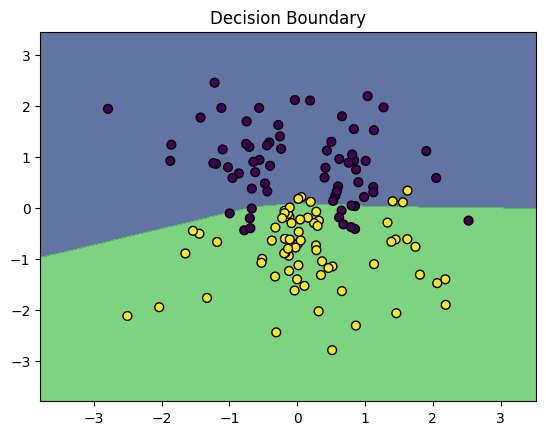

In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from tensorflow import keras
from tensorflow.keras import layers, initializers
from tensorflow.keras.activations import relu

# Set random seed for reproducibility
np.random.seed(1)
keras.utils.set_random_seed(1)

# Data generation - don't modify
centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=200, centers=centers, cluster_std=1, random_state=1)

def generate_curve_data(t):
    # create some space between the classes
    X = np.array([x for x in t if m.cos(4*x[0]) - x[1] < -.5 or m.cos(4*x[0]) - x[1] > .5])
    Y = np.array([1 if m.cos(4*x[0]) - x[1] >= 0 else 0 for x in X])
    return X, Y

X, Y = generate_curve_data(t)

# The model - modified
model = keras.models.Sequential([
    layers.Dense(10, input_dim=2, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(10, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Train the model
history = model.fit(X, Y, batch_size=32, epochs=100, validation_split=0.2)

# Plotting decision boundary
def plot_decision_boundary(model, X, Y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = (Z > 0.5).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, edgecolor='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Decision Boundary")
    plt.show()

# Plot the data and decision boundary
plot_decision_boundary(model, X, Y)


Epoch 1/200
4/4 [==============================] - 2s 75ms/step - loss: 0.7943 - accuracy: 0.5046 - val_loss: 0.6213 - val_accuracy: 0.6071 - lr: 0.0010
Epoch 2/200
4/4 [==============================] - 0s 14ms/step - loss: 0.6844 - accuracy: 0.6239 - val_loss: 0.6076 - val_accuracy: 0.6786 - lr: 0.0010
Epoch 3/200
4/4 [==============================] - 0s 13ms/step - loss: 0.6666 - accuracy: 0.6422 - val_loss: 0.5945 - val_accuracy: 0.7143 - lr: 0.0010
Epoch 4/200
4/4 [==============================] - 0s 16ms/step - loss: 0.6133 - accuracy: 0.6789 - val_loss: 0.5811 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 5/200
4/4 [==============================] - 0s 15ms/step - loss: 0.6476 - accuracy: 0.6239 - val_loss: 0.5688 - val_accuracy: 0.8571 - lr: 0.0010
Epoch 6/200
4/4 [==============================] - 0s 13ms/step - loss: 0.6080 - accuracy: 0.6972 - val_loss: 0.5570 - val_accuracy: 0.8929 - lr: 0.0010
Epoch 7/200
4/4 [==============================] - 0s 13ms/step - loss: 0.5846 - a

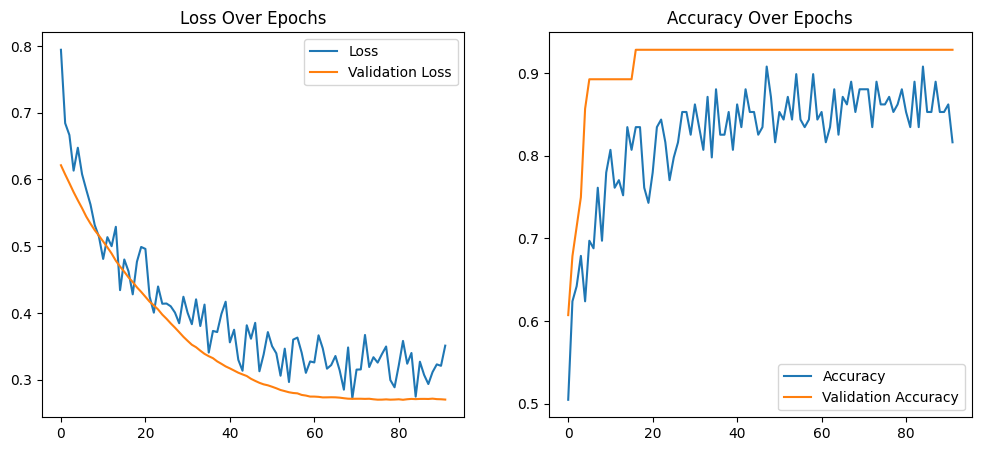

16585/16585 [==============================] - 29s 2ms/step


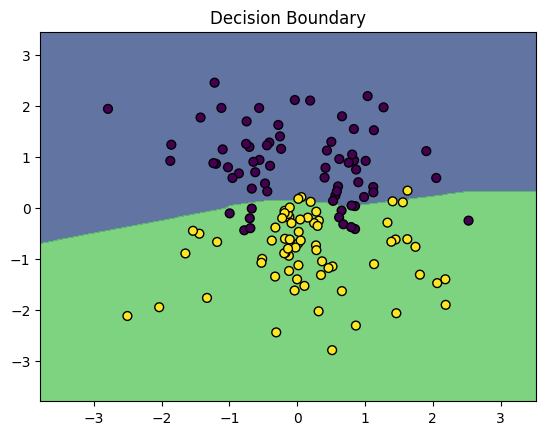

In [2]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# Set random seed for reproducibility
np.random.seed(1)
keras.utils.set_random_seed(1)

# Data generation
centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=200, centers=centers, cluster_std=1, random_state=1)

def generate_curve_data(t):
    X = np.array([x for x in t if m.cos(4*x[0]) - x[1] < -.5 or m.cos(4*x[0]) - x[1] > .5])
    Y = np.array([1 if m.cos(4*x[0]) - x[1] >= 0 else 0 for x in X])
    return X, Y

X, Y = generate_curve_data(t)

# The model
model = keras.models.Sequential([
    layers.Dense(20, input_dim=2, kernel_initializer='he_uniform', activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(10, kernel_initializer='he_uniform', activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 50:
        return lr
    else:
        return lr * np.exp(-0.1)

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the model
history = model.fit(X, Y, batch_size=32, epochs=200, validation_split=0.2,
                    callbacks=[LearningRateScheduler(scheduler), early_stopping])

# Evaluate the model
val_loss, val_accuracy = model.evaluate(X, Y)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.show()

# Plot decision boundary
plot_decision_boundary(model, X, Y)
